# read in data

In [1]:
# tools
import numpy as np
import numpy.random as rand
import collections
from scipy.interpolate import Rbf
from sklearn.manifold import TSNE

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

01 Data Simulation.ipynb
01 Data Simulation_summary.ipynb
01 Data Simulation tmp.ipynb
02 tSNE and Gaussian Kernel Image.ipynb
02 tSNE and Gaussian Kernel Image_summary.ipynb
data_simulation.npz
README.md
tsne_results


In [3]:
#file_name = "data_simulation.npz"
#file_object = open(file_name, 'rb')  
#samples = pickle.load(file_object) 
#file_object.close()

# output the value
file_name_r = "data_simulation.npz"

# open the file for reading
file_object_r = open(file_name_r, 'rb') # wb --- write binary

# read data
data         = np.load(file_object_r)
label_groups = data['label_groups']
num_cells    = data['num_cells']
samples      = data['samples']

# close the file
file_object_r.close()

In [4]:
# check dimension
print(label_groups)
print(num_cells.shape)
print(samples.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(100, 2)
(100, 100000, 3)


In [5]:
# get the parameters
tmp = collections.Counter(label_groups)
num_groups  = len(tmp)
num_samples = list(tmp.values())

num_samples_tot, num_cells_tot, num_features = samples.shape
num_celltypes = num_cells.shape[1]

print("# of groups:                    ", num_groups)
print("# of samples in total:          ", num_samples_tot)
print("# of samples for each group:    ", num_samples)
print("# of cells for each sample:     ", num_cells_tot)
print("# of cell types for each sample:", num_celltypes)
print("# of genes / markers / features:", num_features)

# of groups:                     2
# of samples in total:           100
# of samples for each group:     [70, 30]
# of cells for each sample:      100000
# of cell types for each sample: 2
# of genes / markers / features: 3


# standardization

In [6]:
tmp = np.vstack(samples)
print(tmp.shape)
print(tmp[0:3])

(10000000, 3)
[[ 0.42184219  0.34007888 -0.06228283]
 [ 1.11361267 -0.04632756 -0.93449694]
 [ 0.86227227  0.00118456 -0.77559269]]


In [7]:
#scale_mu = np.apply_along_axis(np.mean, 0, tmp)
#print(scale_mu)
#scale_sd = np.apply_along_axis(np.std,   0, tmp)
#print(scale_sd)

# standardization
tmp = np.vstack(samples)
tmp = (tmp - np.mean(tmp, axis=0)) / np.std(tmp, axis=0)

# check dimension
print(tmp.shape)

# reshape the matrix back
tmp = np.expand_dims(tmp, axis = 0)
tmp = tmp.reshape(num_samples_tot, num_cells_tot, num_features)
print(tmp.shape)

samples_stdard = tmp

(10000000, 3)
(100, 100000, 3)


# random subset of data set

In [8]:
print(num_cells_tot)
print(samples_stdard.shape)

100000
(100, 100000, 3)


In [9]:
k = 1000
rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]

In [10]:
print(samples_stdard[0].shape)
print(samples_stdard[0][idx].shape)

(100000, 3)
(1000, 3)


# Generate t-SNE plot

Note:   
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b


In [11]:
# get data
rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
data = samples_stdard[0][idx]

# generate t-SNE plot
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 0)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.094490
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.073849
[t-SNE] Error after 300 iterations: 0.944524


In [12]:
tsne_results.shape

(1000, 2)

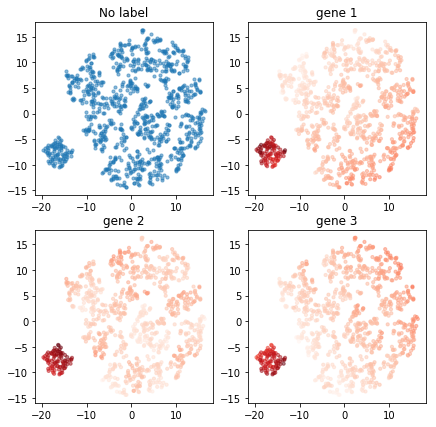

In [13]:
tmp = tsne_results
fig, axes = plt.subplots(2, 2, figsize=(7,7))
axes = axes.ravel()

#color = ["#fbb4ae"] * 903 + ["#b3cde3"] * 97
axes[0].scatter(
    tmp[:, 0], tmp[:, 1], 
    s=10, alpha=0.5)
axes[0].title.set_text("No label")

z = data[:, 0]
axes[1].scatter(
    tmp[:, 0], tmp[:, 1], 
    s=10, alpha=0.5, c = z, 
    cmap=plt.get_cmap('Reds'))
axes[1].title.set_text("gene 1")

z = data[:, 1]
axes[2].scatter(
    tmp[:, 0], tmp[:, 1], 
    s=10, alpha=0.5, c = z, 
    cmap=plt.get_cmap('Reds'))
axes[2].title.set_text("gene 2")

z = data[:, 2]
axes[3].scatter(
    tmp[:, 0], tmp[:, 1], 
    s=10, alpha=0.5, c = z, 
    cmap=plt.get_cmap('Reds'))
axes[3].title.set_text("gene 3")

plt.show()

# test RBF interpolation

In [14]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html

from scipy.interpolate import Rbf
#x, y, z, d = np.random.rand(4, 50)
#rbfi = Rbf(x, y, z, d)  # radial basis function interpolator instance
#xi = yi = zi = np.linspace(0, 1, 20)
#di = rbfi(xi, yi, zi)   # interpolated values

x, y, d = np.random.rand(3, 50)

# radial basis function interpolator instance
rbfi = Rbf(x, y, d, function='multiquadric')  

# interpolated values
xi = yi = np.linspace(0, 1, 50)
xi, yi = np.meshgrid(xi, yi)
xi = xi.ravel()
yi = yi.ravel()
di = rbfi(xi, yi)  

di = (di - min(di)) / (max(di) - min(di))

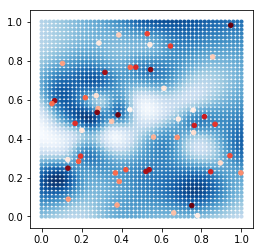

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(4,4))

axes.scatter(
    xi, yi, 
    s=10, alpha=1, c = di, 
    cmap=plt.get_cmap('Blues'))

axes.scatter(
    x, y, 
    s=20, alpha=1, c = d, 
    cmap=plt.get_cmap('Reds'))


plt.show()

# convert t-SNE plot into image

In [16]:
# initialization
tmp = tsne_results
print(tmp.shape)
n_grid = 100

rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
data = samples_stdard[0][idx]
print(data.shape)

(1000, 2)
(1000, 3)


In [17]:
# create grid
x = tmp[:, 0]
x_c = np.linspace(min(x), max(x), n_grid)

y = tmp[:, 1]
y_c = np.linspace(min(y), max(y), n_grid)

x_c, y_c = np.meshgrid(x_c, y_c)
#x_c = x_c.ravel()
#y_c = y_c.ravel()

In [19]:
# grid length
#x_c[1] - x_c[0]

In [20]:
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.interpolate.Rbf.html
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
z = data[:, 0]

# gaussian interpolation using radial basis function
#rbfi = Rbf(x, y, z, function='multiquadric', epsilon = 0.01*(x_c[1]-x_c[0]))
rbfi = Rbf(x, y, z, function='multiquadric', smooth=1)
#rbfi = Rbf(x, y, z, function='gaussian', smooth = 10000)
#rbfi = Rbf(x, y, z, function='inverse', smooth = 1, epsilon = 0.01*(x_c[1]-x_c[0]))
#rbfi = Rbf(x, y, z, function='linear', smooth = 1, epsilon = 0.01*(x_c[1]-x_c[0]))
#rbfi = Rbf(x, y, z, function='cubic', smooth = 1, epsilon = 0.01*(x_c[1]-x_c[0]))
#rbfi = Rbf(x, y, z, function='thin_plate', smooth = 1, epsilon = 0.01*(x_c[1]-x_c[0]))
z_c = rbfi(x_c, y_c)

# linear scaling
#z_c = (z_c - min(z_c)) / (max(z_c) - min(z_c))

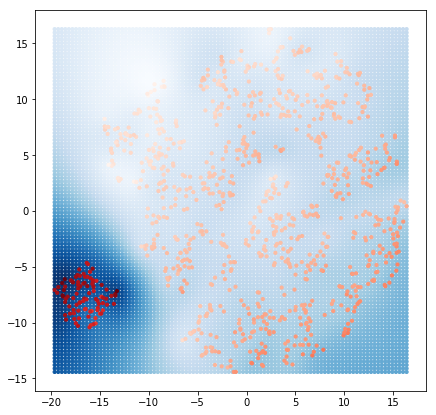

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(7,7))

axes.scatter(
    x_c, y_c, 
    s=10, alpha=1, c = z_c, 
    cmap=plt.get_cmap('Blues'))

axes.scatter(
    x, y, 
    s=10, alpha=1, c = z, 
    cmap=plt.get_cmap('Reds'))
#plt.colorbar()
plt.show()

In [22]:
img = np.c_[x_c, y_c, z_c]
img.shape

(100, 300)

# Combine the code above

In [23]:
def data_standardization(samples, verbose = True):
    """standardized features of all samples"""
    
    if (verbose):
        print("Data Standardization...")
        
    # initialization
    # assert(len(samples.shape) == 3)
    num_samples_tot, num_cells_tot, num_features = samples.shape
    
    ##### standardization #####
    # standardize
    res = np.vstack(samples)
    res = (res - np.mean(res, axis=0)) / np.std(res, axis=0)

    # reshape the matrix back
    res = np.expand_dims(res, axis = 0)
    res = res.reshape(num_samples_tot, num_cells_tot, num_features)
    
    if (verbose):
        print("...Finish")
    return(res)

def data_augmentation(samples, label_groups, k = 1000, num_subsets = 10, rand_seed = 0, verbose = True):
    """create t-SNE plot for each sample"""
    
    if (verbose):
        print("Data Augmentation...")
    # initialization
    # assert(len(samples.shape) == 3)
    rand.seed(rand_seed)
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_samples = []
    result_labels  = []
    
    # iterate through all samples
    for idx_sample in range(num_samples_tot):
        sample = samples[idx_sample]
        
        # record the corresponding label
        group  = label_groups[idx_sample]
        result_labels += ([group] * num_subsets)
        
        # generate subsets in each sample
        for _ in range(num_subsets):
            
            # choose k cells randomly
            idx = rand.permutation(num_cells_tot)[:k]
            result_samples.append(samples[idx_sample][idx])
              
    # arrange result
    result_samples = np.array(result_samples) # (num_samples_tot * num_subsets, k, num_genes)
    result_labels  = np.array(result_labels)  # (num_samples_tot * num_subsets,)
    
    if (verbose):
        print("...Finish")
    
    return result_labels, result_samples

def create_tsne(samples, rand_seed = 0, verbose = True):
    """create t-SNE plot for each sample"""
    
    if (verbose):
        print("Create t-SNE plots...")
    
    # initialization
    # assert(len(samples.shape) == 3)
    rand.seed(rand_seed)
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_tsne = []
    
    # generate tsne plot for each sample
    for idx_sample in range(num_samples_tot):
        if (verbose):
            print("    Prepare t-SNE plot of the", idx_sample, "sample")
        
        # for each sample, generate a t-SNE plot
        sample = samples[idx_sample]
        tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
        res = tsne.fit_transform(sample)
        result_tsne.append(res)
    
    # convert the result from list to numpy array
    result_tsne = np.array(result_tsne)
    
    if (verbose):
        print("...Finish")
        
    return result_tsne

def create_img(tsne_plots, samples, n_grid = 128, verbose = True):
    """create image from t-SNE plot"""
    
    if (verbose):
        print("Create images from t-SNE plot...")
        
    # initialization
    # assert tsne_plots.shape[0] == tsne_plots.shape[0]
    num_samples_tot, num_cells_tot, num_features = samples.shape
    result_img = []
    
    # iterate though each samples
    for idx_sample in range(num_samples_tot):
        if (verbose):
            print("    Prepare image of the", idx_sample, "sample")
        
        # get each sample and its corresponding plot
        sample = samples[idx_sample]
        tsne_plot = tsne_plots[idx_sample]
        
        # get x, y coordinate of a plot
        x = tsne_plot[:, 0]
        y = tsne_plot[:, 1]
        
        # generate a grid
        x_c = np.linspace(min(x), max(x), n_grid)
        y_c = np.linspace(min(y), max(y), n_grid)
        x_c, y_c = np.meshgrid(x_c, y_c)
        
        # each feature is a layer/channel for the plot
        # to get each layer, perform interpolation to convert tSNE plot in a image
        result_z = []
        for idx_feature in range(num_features):
        
            z = sample[:, idx_feature]
            rbfi = Rbf(x, y, z, function='multiquadric', smooth=1)
            z_c = rbfi(x_c, y_c)
            result_z.append(z_c)
            #print(z_c.shape)
            
        # arrange the interpolated feature values    
        #print(len(result_z))
        result_z = np.array(result_z)
        
        # append each interpolated result to the result
        result_img.append(result_z)
        #print(len(result_img))
    
    # convert the result from list to numpy array
    result_img = np.array(result_img)
    
    if (verbose):
        print("...Finish")
        
    return result_img

In [43]:
tmp = samples
tmp = data_standardization(tmp)

data_labels, data_samples = data_augmentation(tmp, label_groups, k = 1000, num_subsets = 2)

tmp = data_samples[0:1]
data_tsne = create_tsne(tmp)
data_img = create_img(data_tsne, tmp)

print("================")
print("check dimension")
print("- Samples:", data_samples.shape)
print("- Labels: ", data_labels.shape)
print("- t-SNE:  ", data_tsne.shape)
print("- Imgage: ", data_img.shape)

Data Standardization...
...Finish
Data Augmentation...
...Finish
Create t-SNE plots...
    Prepare t-SNE plot of the 0 sample
...Finish
Create images from t-SNE plot...
    Prepare image of the 0 sample
...Finish
check dimension
- Samples: (200, 1000, 3)
- Labels:  (200,)
- t-SNE:   (1, 1000, 2)
- Imgage:  (1, 3, 128, 128)


In [44]:
# initialization
data = data_samples[0]
tsne = data_tsne[0]
img  = data_img[0]
n_grid = 128

print("================")
print("check dimension")
print(data.shape)
print(tsne.shape)
print(img.shape)

# get tsne coordinate
x = tsne[:, 0]
y = tsne[:, 1]
z = data[:, 0]

# create grid
x_c = np.linspace(min(x), max(x), n_grid)
y_c = np.linspace(min(y), max(y), n_grid)
x_c, y_c = np.meshgrid(x_c, y_c)
z_c = img[0]

check dimension
(1000, 3)
(1000, 2)
(3, 128, 128)


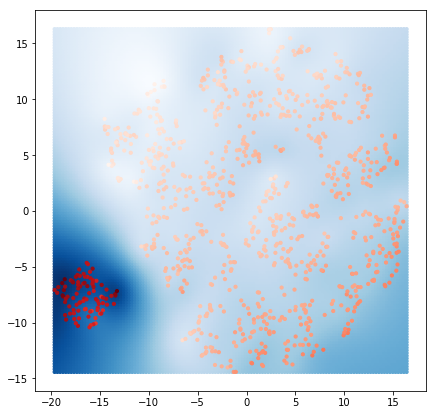

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(7,7))

axes.scatter(
    x_c, y_c, 
    s=10, alpha=1, c = z_c, 
    cmap=plt.get_cmap('Blues'))

axes.scatter(
    x, y, 
    s=10, alpha=1, c = z, 
    cmap=plt.get_cmap('Reds'))
#plt.colorbar()
plt.show()

### Test code
**Iterate through points using indices**

In [91]:
count = 0
idx_X, idx_Y = np.meshgrid(range(n_grid), range(n_grid))

for idx_x, idx_y in zip(idx_X.ravel(), idx_Y.ravel()):
    print(idx_x, idx_y)
    count += 1
    if count > 6:
        break
        #

0 0
1 0
2 0
3 0
4 0
5 0
6 0


### Test code
**broadcasting multiplication of a matrix with a vector**

In [162]:
e2 = np.eye(n)[:, 1, None]
vals = np.multiply(e2, samples[0])

print(samples[0][:6])
print("------------")
print(vals[0:6])
print("------------")
print(vals.sum(axis=0))

[[-1.81956403  2.3817902   1.2944442 ]
 [-1.44105557  1.63350742 -0.69591281]
 [-1.17400293  1.9547806   1.37170538]
 [ 0.09806805  1.7231047   1.606942  ]
 [ 0.13560273  2.02302379  0.39692241]
 [-2.04314746  1.76443032 -0.67150114]]
------------
[[-0.          0.          0.        ]
 [-1.44105557  1.63350742 -0.69591281]
 [-0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.          0.         -0.        ]]
------------
[-1.44105557  1.63350742 -0.69591281]


### Test Code
**calculate weights**

In [163]:
tmp = np.array([
    [3,  4],
    [5, 12],
    [7, 24]
])
weights = np.apply_along_axis(np.linalg.norm, 1, tmp)
print(weights)

weights = np.apply_along_axis(np.linalg.norm, 1, tsne_results)
print(weights.shape)
print(samples[0][:, 0].shape)

[ 5. 13. 25.]
(1000,)
(1000,)


### Test Code
**Combine the test code above**

In [161]:
count = 0
for idx_x, idx_y in zip(idx_X.ravel(), idx_Y.ravel()):
    
    cord_grid = X[idx_y][idx_x], Y[idx_y][idx_x]
    
    weights = np.apply_along_axis(np.linalg.norm, 1, tsne_results - cord_grid)
    weights = np.array([weights]).transpose()
    
    vals = np.multiply(weights, samples[0])
    vals = vals.sum(axis=0)
    
    print(cord_grid, [idx_x, idx_y], vals)
    count += 1
    if count > 6:
        break

(-15.213150978088379, -15.213150978088379) [0, 0] [13424.84823669 76699.295776   39551.23443236]
(-14.957686717115989, -15.213150978088379) [1, 0] [13524.78023113 76246.84047749 39416.11417316]
(-14.702222456143597, -15.213150978088379) [2, 0] [13624.68999611 75797.85519135 39281.96316212]
(-14.446758195171206, -15.213150978088379) [3, 0] [13724.55198893 75352.39850276 39148.79307804]
(-14.191293934198814, -15.213150978088379) [4, 0] [13824.33986085 74910.5293463  39016.61679597]
(-13.935829673226424, -15.213150978088379) [5, 0] [13924.02640027 74472.30696902 38885.44840418]
(-13.680365412254034, -15.213150978088379) [6, 0] [14023.58346341 74037.79089532 38755.3032068 ]


### Test Code:
**Try linear scaled to [0, 1]**

In [169]:
np.c_[np.arange(0, 10), np.arange(10, 0, -1)]

array([[ 0, 10],
       [ 1,  9],
       [ 2,  8],
       [ 3,  7],
       [ 4,  6],
       [ 5,  5],
       [ 6,  4],
       [ 7,  3],
       [ 8,  2],
       [ 9,  1]])

In [175]:
tmp = np.c_[np.arange(0, 10), np.arange(10, 0, -1)]
print(np.max(tmp, axis = 0) - np.min(tmp, axis = 0))
(tmp - np.min(tmp, axis = 0)) / (np.max(tmp, axis = 0) - np.min(tmp, axis = 0))

[9 9]


array([[0.        , 1.        ],
       [0.11111111, 0.88888889],
       [0.22222222, 0.77777778],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.66666667, 0.33333333],
       [0.77777778, 0.22222222],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

### Combine all the code

In [190]:
print(p)
print(np.empty((0, p)))

3
[]


In [204]:
count = 0
img = np.empty((0, p))
for idx_x, idx_y in zip(idx_X.ravel(), idx_Y.ravel()):
    
    cord_grid = X[idx_y][idx_x], Y[idx_y][idx_x]
    
    weights = np.apply_along_axis(np.linalg.norm, 1, tsne_results - cord_grid)
    weights = np.array([weights]).transpose()
    
    vals = np.multiply(weights, samples[0])
    vals = vals.sum(axis=0, keepdims=True)
    
    img = np.r_[img, vals]
    
    #print(cord_grid, [idx_x, idx_y], vals)
    #count += 1
    #if count > 100:
    #    break

In [205]:
img.shape

(16384, 3)

In [ ]:
tmp = img
tmp = (tmp - np.min(tmp, axis = 0)) / (np.max(tmp, axis = 0) - np.min(tmp, axis = 0))